In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pycountry
import re
from sklearn.feature_extraction.text import TfidfVectorizer

import preprocess as pre

In [2]:
users_file = "BX-Users.csv"
books_file = "BX-Books.csv"
rating_file = "BX-Ratings.csv"
new_users_file = "BX-NewBooksUsers.csv"
new_books_file = "BX-NewBooks.csv"
new_ratings_file = "BX-NewBooksRatings.csv"

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,274292,newton abbot,england,"united kingdom""",5.0,0-10,0753804700,8,Reader,Bernhard Schlink,0,Phoenix Books
1,182763,melbourne,victoria,"australia""",15.0,10-20,0753804700,8,Reader,Bernhard Schlink,0,Phoenix Books
2,255846,paris,paris,"france""",21.0,20-30,0753804700,6,Reader,Bernhard Schlink,0,Phoenix Books
3,132376,cheltenham,england,"united kingdom""",25.0,20-30,0753804700,9,Reader,Bernhard Schlink,0,Phoenix Books
4,144647,ballarat,victoria,"australia""",25.0,20-30,0753804700,5,Reader,Bernhard Schlink,0,Phoenix Books
...,...,...,...,...,...,...,...,...,...,...,...,...
204159,232373,calgary,alberta,"canada""",65.0,60-70,0449200183,8,Braided Lives,Marge Piercy,1983,Ballantine Books
204160,118632,atlanta,georgia,"usa""",64.0,60-70,0312853807,7,Zero Coupon,Paul Erdman,1993,St Martins Pr
204161,160697,erie,pennsylvania,"usa""",67.0,60-70,0312853807,7,Zero Coupon,Paul Erdman,1993,St Martins Pr
204162,158606,dunedin,florida,"usa""",72.0,70-80,0312853807,10,Zero Coupon,Paul Erdman,1993,St Martins Pr


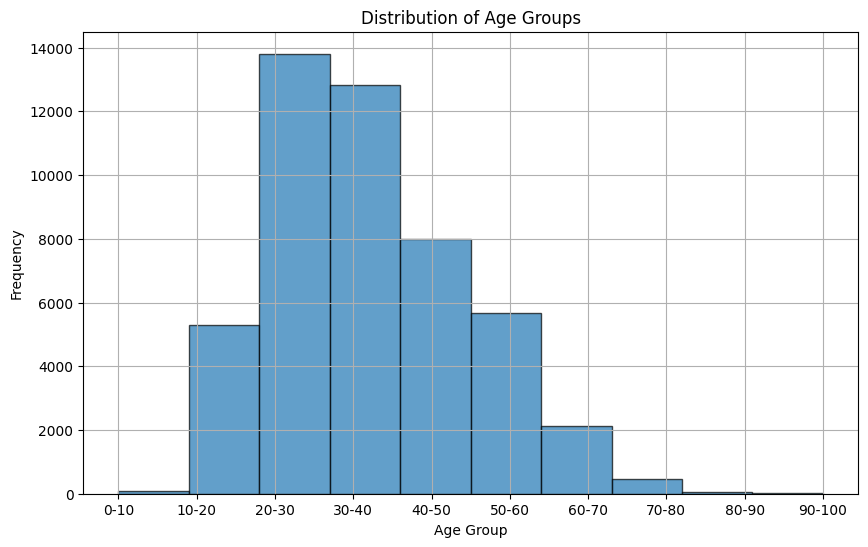

In [3]:
users_df = pd.read_csv(users_file)
ratings_df = pd.read_csv(rating_file)
books_df = pd.read_csv(books_file)

# Imputation missing data and discretise the age based on an age group
users_df = pre.ages_imputation(pre.weighted_age_dict(users_file), users_df)
users_df = pre.city_imputation(users_df)
users_df = pre.state_imputation(users_df)
users_df = pre.country_imputation(users_df)
users_df = pre.discretising(users_df, ratings_df, books_df)
merged_df = pd.merge(users_df, ratings_df, on="User-ID", how="inner")
merged_df = pd.merge(merged_df, books_df, on="ISBN", how="inner")
merged_df = pre.author_imputation(merged_df)
merged_df

Text processing frist step: Write everyting into uppercase, unitify the counties of users.

In [4]:
merged_df = pre.text_process(merged_df)
merged_df.to_csv("merge.csv", index=False)
tfidf_merged_df = pre.create_tfidf_df(merged_df)
tfidf_merged_df